# Exploración de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss

In [86]:
data = pd.read_csv('../Datasets/Social_Network_Ads.csv')

In [3]:
data.shape

(400, 5)

In [4]:
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [5]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
#1.Análisis Univariado

#media
data['Age'].mean()

37.655

In [8]:
#mediana
data['Age'].median()

37.0

In [9]:
#moda
data['Age'].mode()

0    35
Name: Age, dtype: int64

In [10]:
#cuartiles
data['Age'].quantile()

37.0

In [11]:
data['Age'].quantile([0])

0.0    18.0
Name: Age, dtype: float64

In [12]:
data['Age'].quantile([1])

1.0    60.0
Name: Age, dtype: float64

In [13]:
data['Age'].quantile([0.25])

0.25    29.75
Name: Age, dtype: float64

In [14]:
data['Age'].quantile([0.50])

0.5    37.0
Name: Age, dtype: float64

In [15]:
data['Age'].quantile([0.75])

0.75    46.0
Name: Age, dtype: float64

In [16]:
#decil
data['Age'].quantile([0.10])

0.1    24.0
Name: Age, dtype: float64

In [17]:
data['Age'].quantile([0.20])

0.2    28.0
Name: Age, dtype: float64

In [18]:
data['Age'].quantile([0.90])

0.9    52.1
Name: Age, dtype: float64

In [19]:
#rango
data['Age'].min()

18

In [20]:
data['Age'].max()

60

In [21]:
data['Age'].max()-data['Age'].min()

42

In [22]:
#rango intercuartílico
data['Age'].quantile(0.75)-data['Age'].quantile(0.25)

16.25

In [23]:
#varianza
data['Age'].var()

109.89070175438596

In [24]:
#desviación estándar
data['Age'].std()

10.482876597307914

In [25]:
data['Age'].std(ddof=0) #poblacional

10.46976480156073

In [26]:
data['Age'].std(ddof=1) #muestral

10.482876597307914

In [27]:
#coeficiente de variación
data['Age'].std(ddof=0)/data['Age'].mean()

0.278044477534477

In [28]:
#coeficiente de asimetría
ss.skew(data['Age'])

0.23046904236325927

In [29]:
#coeficiente de curtosis
ss.kurtosis(data['Age'])

-0.6297213829600437

In [30]:
#resumen
data['Age'].describe()

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64

In [31]:
data['EstimatedSalary'].describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

In [32]:
#Prueba de normalidad
ss.shapiro(data.EstimatedSalary)

ShapiroResult(statistic=0.9600138068199158, pvalue=5.734485331032602e-09)

In [33]:
ss.normaltest(data.EstimatedSalary)

NormaltestResult(statistic=19.18964958710917, pvalue=6.808015523241932e-05)

In [38]:
#2. Análisis Bivariado
data.iloc[:,2:].corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


In [40]:
# para data distribuida normalmente
data.iloc[:,2:].corr(method = "pearson")

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


In [42]:
# para data no distribuida normalmente
data.iloc[:,2:].corr(method = "spearman")

,Age,EstimatedSalary,Purchased
Age,1.000000,0.124824,0.612323
EstimatedSalary,0.124824,1.000000,0.306858
Purchased,0.612323,0.306858,1.000000


In [43]:
# para data no distribuida normalmente
# preferido sobre spearman
data.iloc[:,2:].corr(method = "kendall")

,Age,EstimatedSalary,Purchased
Age,1.000000,0.083686,0.507788
EstimatedSalary,0.083686,1.000000,0.252104
Purchased,0.507788,0.252104,1.000000


In [45]:
ss.pearsonr(data['Age'],data['EstimatedSalary'])

PearsonRResult(statistic=0.15523801797210005, pvalue=0.0018460568005798244)

In [46]:
ss.spearmanr(data['Age'],data['EstimatedSalary'])

SignificanceResult(statistic=0.12482434405192087, pvalue=0.01247367042800823)

In [47]:
ss.kendalltau(data['Age'],data['EstimatedSalary'])

SignificanceResult(statistic=0.08368633489101734, pvalue=0.014197892722130716)

In [48]:
np.corrcoef(data['Age'],data['EstimatedSalary'])

array([[1.        , 0.15523802],
       [0.15523802, 1.        ]])

array([<Axes: ylabel='Frequency'>], dtype=object)

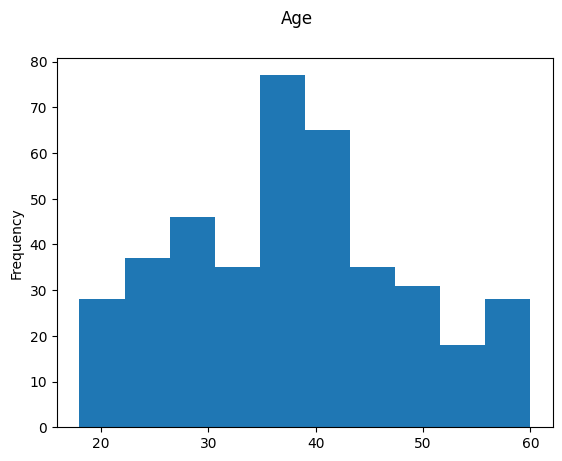

In [49]:
#3.Visualización de datos
#Histograma
data['Age'].plot(kind='hist',bins=10,title='Age',subplots=True)

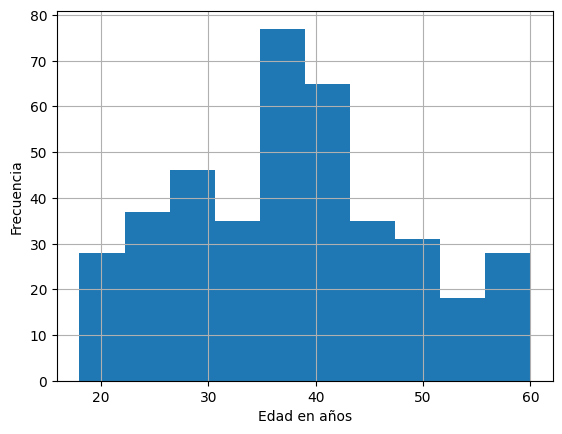

In [50]:
data['Age'].hist(bins=10) 
plt.xlabel("Edad en años")
plt.ylabel("Frecuencia")
plt.show()

array([<Axes: ylabel='Frequency'>], dtype=object)

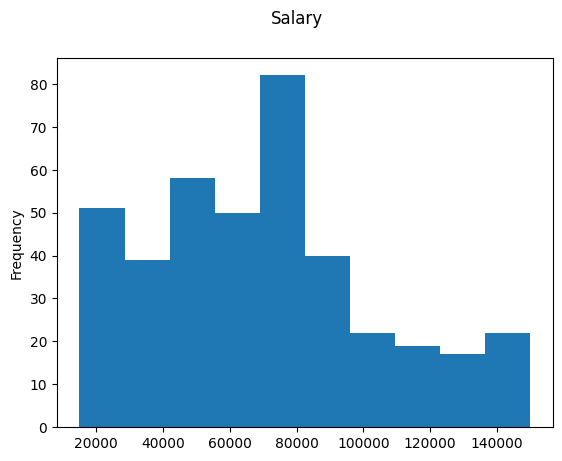

In [51]:
data['EstimatedSalary'].plot(kind='hist',bins=10,title='Salary',subplots=True)

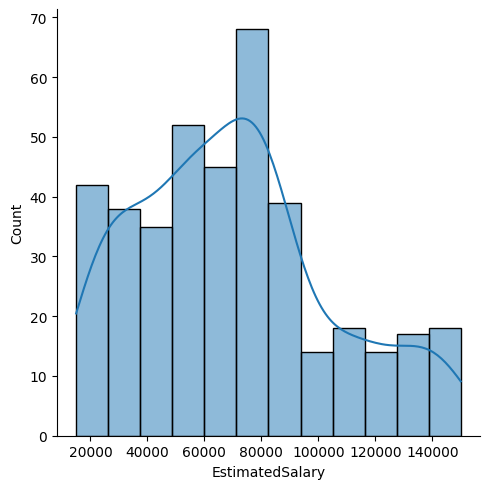

In [82]:
sns.displot(data['EstimatedSalary'], kde=True)

<Axes: ylabel='Density'>

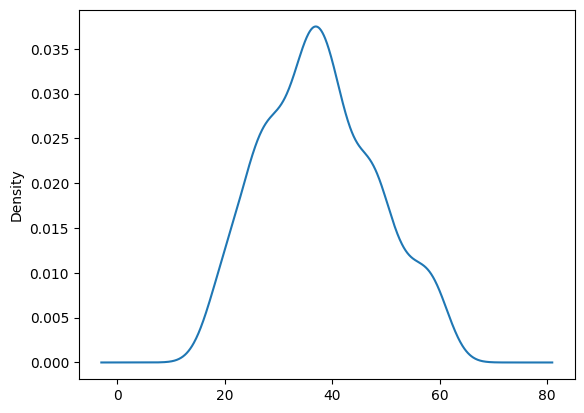

In [53]:
#Densidad
data['Age'].plot(kind='density')

<Axes: xlabel='Age', ylabel='Density'>

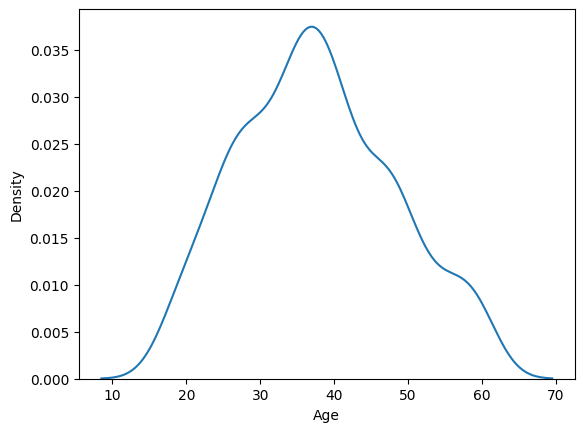

In [54]:
sns.kdeplot(data['Age'])

<Axes: xlabel='Age', ylabel='Density'>

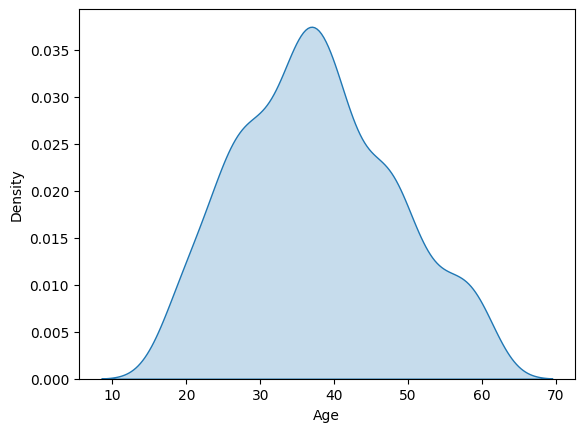

In [84]:
sns.kdeplot(data['Age'], fill=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1fd574e8790>,
 'caps': [<matplotlib.lines.Line2D at 0x1fd574e99d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fd574c3950>],
 'medians': [<matplotlib.lines.Line2D at 0x1fd574eabd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fd574c1450>],
 'means': []}

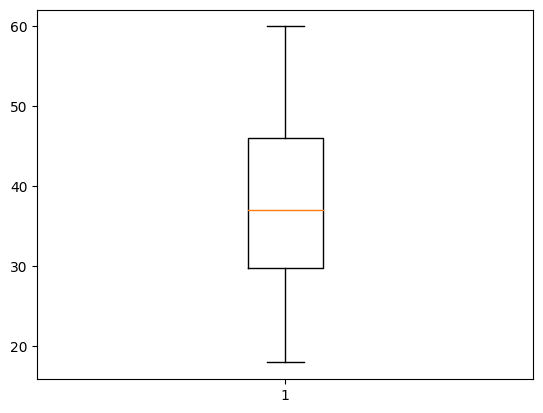

In [56]:
#Boxplot
plt.boxplot(data['Age'])

<Axes: >

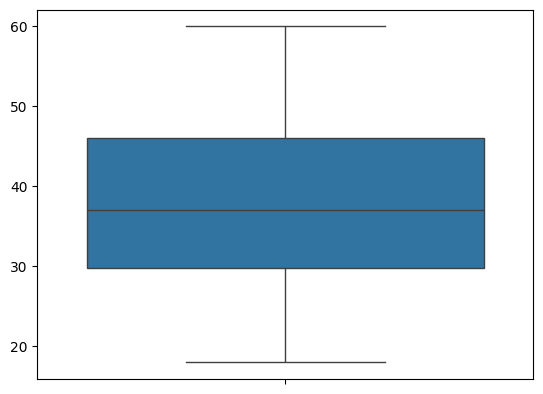

In [57]:
sns.boxplot(list(data['Age']))

<Axes: xlabel='Age'>

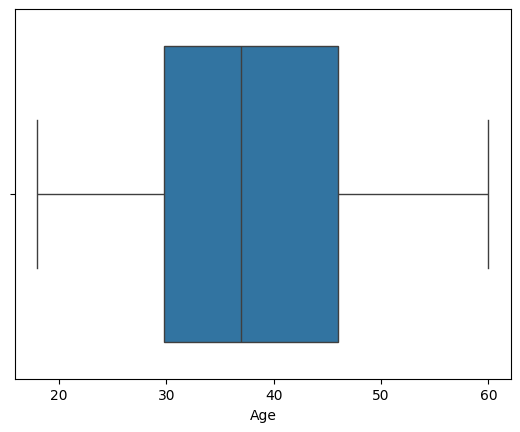

In [58]:
sns.boxplot(x='Age',data=data)

<Axes: ylabel='Age'>

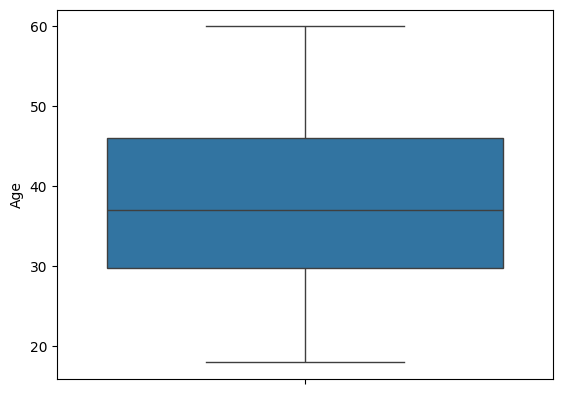

In [59]:
sns.boxplot(y='Age',data=data)

<Axes: xlabel='Purchased', ylabel='Age'>

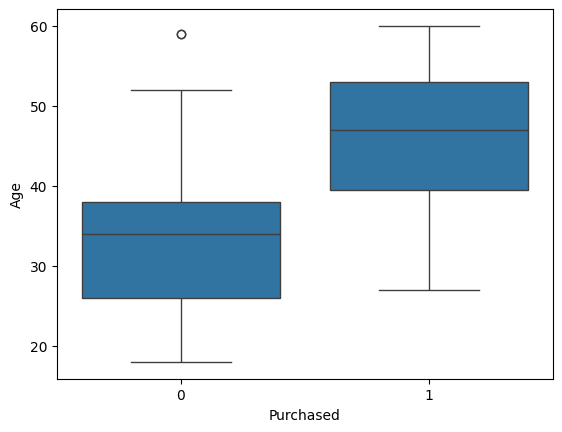

In [60]:
sns.boxplot(x='Purchased',y='Age',data=data)

<Axes: xlabel='Purchased', ylabel='EstimatedSalary'>

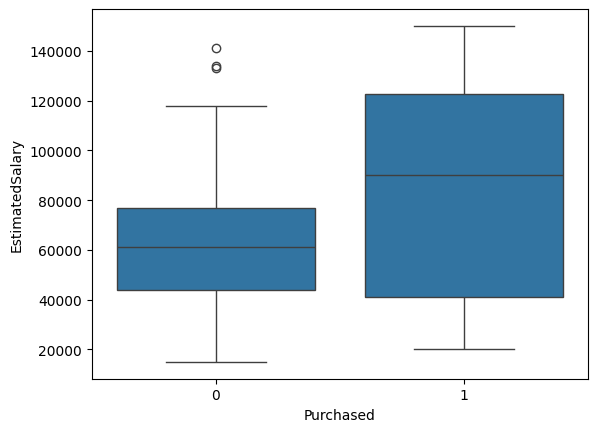

In [61]:
sns.boxplot(x='Purchased',y='EstimatedSalary',data=data)

<Axes: ylabel='Age'>

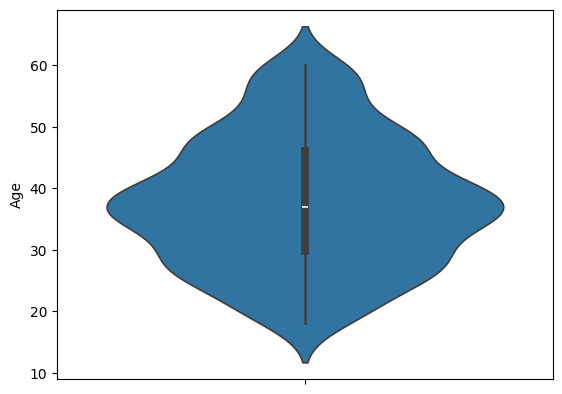

In [62]:
#Violin Plot
sns.violinplot(y='Age',data=data)

<Axes: xlabel='Purchased', ylabel='Age'>

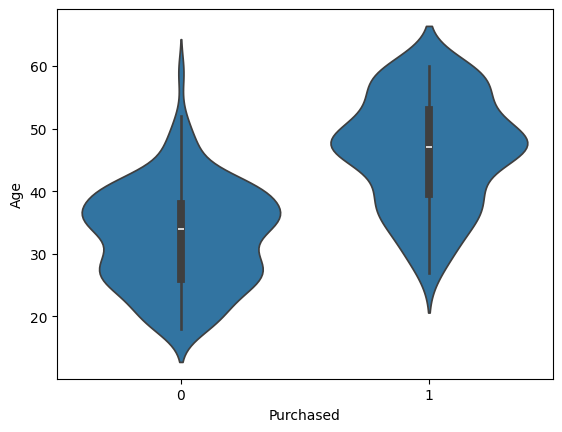

In [63]:
sns.violinplot(x='Purchased',y='Age',data=data)

<Axes: ylabel='Age'>

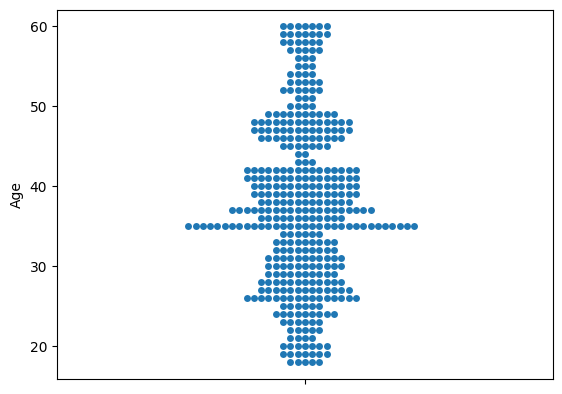

In [64]:
#Swarm Plot
sns.swarmplot(data['Age'])

<Axes: xlabel='EstimatedSalary'>

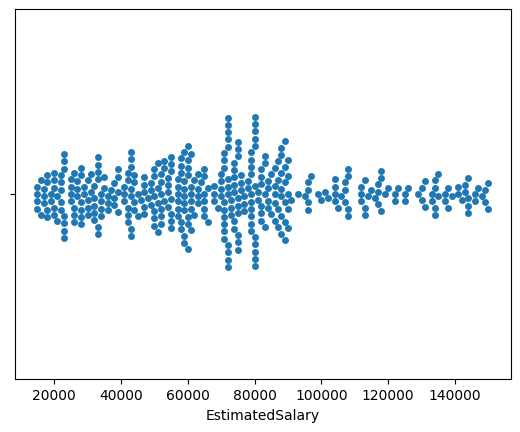

In [65]:
sns.swarmplot(x=data['EstimatedSalary'])

<Axes: ylabel='EstimatedSalary'>

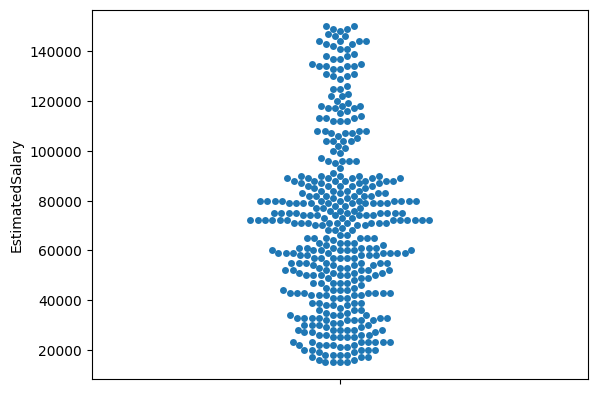

In [66]:
sns.swarmplot(y=data['EstimatedSalary'])

<Axes: xlabel='Purchased', ylabel='EstimatedSalary'>

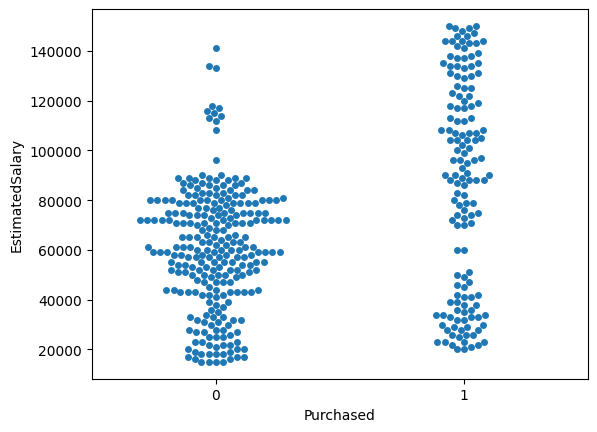

In [67]:
sns.swarmplot(y=data['EstimatedSalary'],x=data['Purchased'])

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

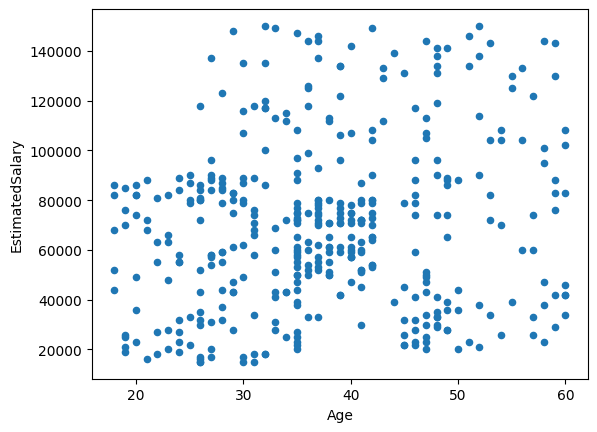

In [68]:
#Gráfico de dispersión
data.plot(kind='scatter', x='Age', y='EstimatedSalary')

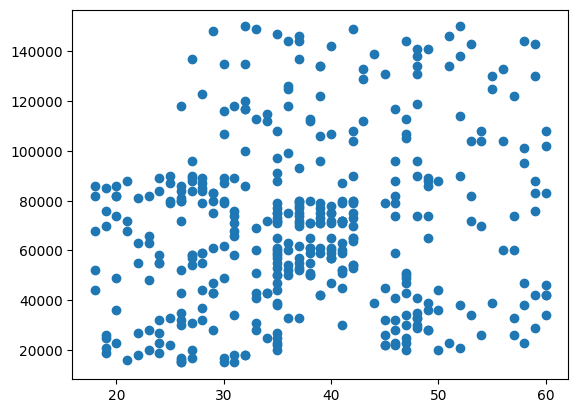

In [69]:
plt.scatter(data['Age'],data['EstimatedSalary'])

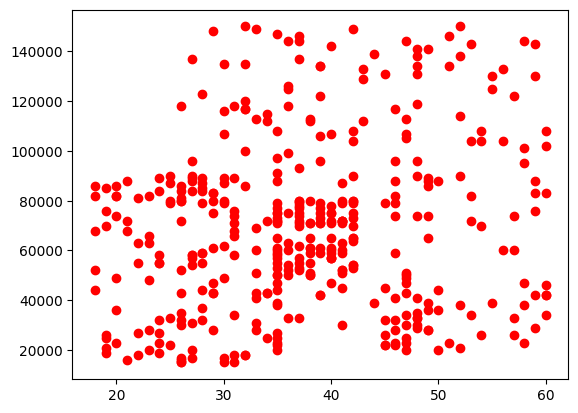

In [70]:
plt.plot(data['Age'],data['EstimatedSalary'],"ro")

<Axes: >

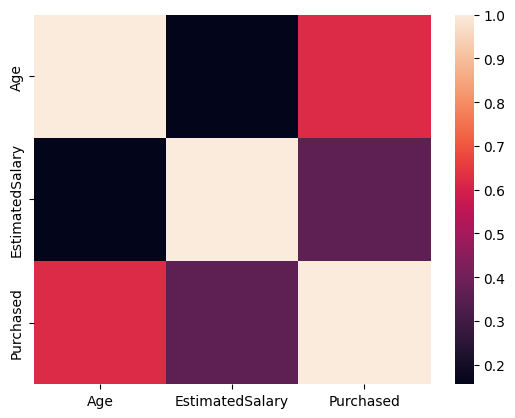

In [73]:
sns.heatmap(data.iloc[:,2:].corr())

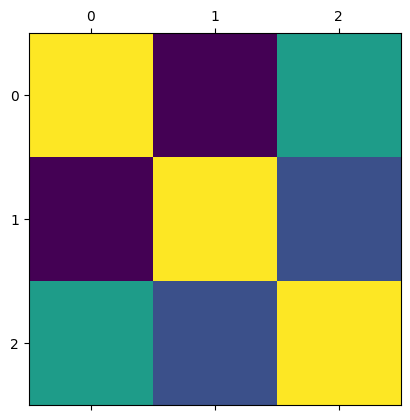

In [74]:
plt.matshow(data.iloc[:,2:].corr())

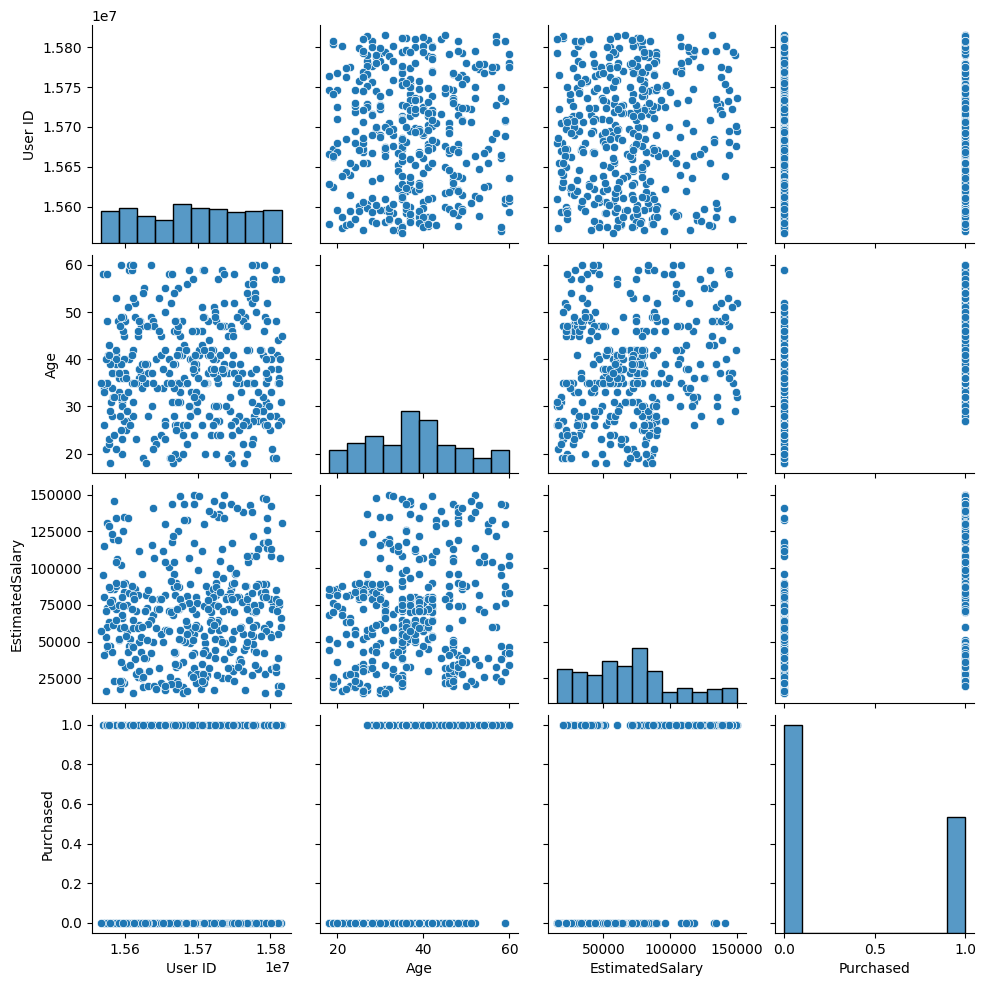

In [75]:
sns.pairplot(data)

<Axes: xlabel='Purchased'>

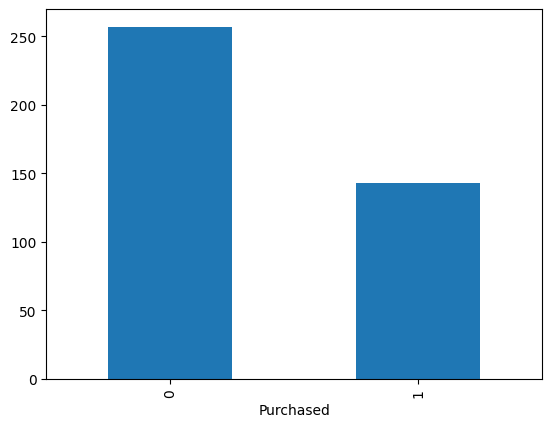

In [76]:
#Bar Chart
data['Purchased'].value_counts().plot.bar()

([<matplotlib.patches.Wedge at 0x1fd5b20f190>,
 [Text(-0.47615978768185807, 0.9916006537889979, '0'),
  Text(0.47615969484150195, -0.9916006983702906, '1')])

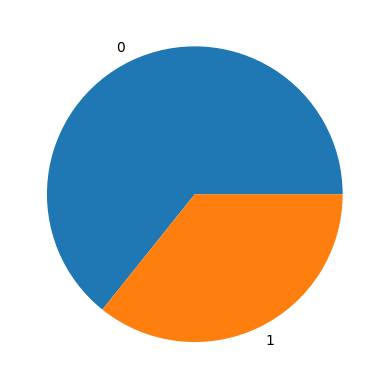

In [78]:
#Pie Chart
plt.pie(data['Purchased'].value_counts(),labels=['0','1'])

visualizamos si existe alguna diferencia significativa en las tasas de compra entre los géneros.

Gender     Female  Male
Purchased              
0             127   130
1              77    66


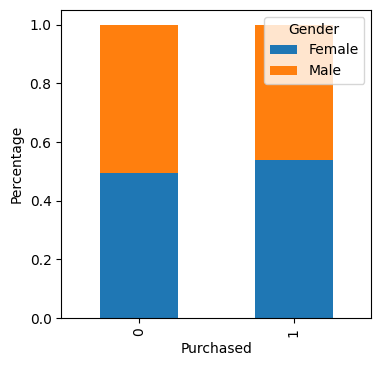

In [80]:
print(pd.crosstab(data["Purchased"],data["Gender"]))
Gender = pd.crosstab(data["Purchased"],data["Gender"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Purchased")
plt.ylabel("Percentage")
plt.show()